In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',23)
arquivo = pd.read_csv('D:/Github/data-science/machine-learning/algoritmos/exercicio-pratico-final/recipeData.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 9775: invalid continuation byte

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',23)
arquivo = pd.read_csv('D:/Github/data-science/machine-learning/algoritmos/exercicio-pratico-final/recipeData.csv', encoding = "ISO-8859-1")

In [8]:
arquivo.head(3)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN


In [9]:
arquivo.shape

(73861, 23)

In [10]:
faltantes = arquivo.isnull().sum()
faltantes_percentual = (arquivo.isnull().sum() / len(arquivo['StyleID'])) * 100
print(faltantes_percentual)

BeerID            0.000000
Name              0.001354
URL               0.000000
Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.839550
PrimingAmount    93.536508
UserId           68.358132
dtype: float64


In [11]:
arquivo['StyleID'].value_counts()

7      11940
10      7581
134     2617
9       2277
4       2038
       ...  
99         6
16         6
127        5
164        2
73         2
Name: StyleID, Length: 176, dtype: int64

In [12]:
selecao = arquivo.loc[arquivo['StyleID'].isin([7, 10, 134, 9, 4, 30, 86, 12, 92, 6, 175, 39])]

In [13]:
selecao.shape

(35424, 23)

In [14]:
selecao.drop('BeerID', axis = 1, inplace = True)
selecao.drop('Name', axis = 1, inplace = True)
selecao.drop('URL', axis = 1, inplace = True)
selecao.drop('Style', axis = 1, inplace = True)
selecao.drop('UserId', axis = 1, inplace = True)
selecao.drop('PrimingMethod', axis = 1, inplace = True)
selecao.drop('PrimingAmount', axis = 1, inplace = True)

In [15]:
selecao.head(3)

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.0,NaN


In [16]:
selecao.dtypes

StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
dtype: object

In [17]:
arquivo['SugarScale'].value_counts()

Specific Gravity    71959
Plato                1902
Name: SugarScale, dtype: int64

In [18]:
arquivo['BrewMethod'].value_counts()

All Grain       49692
BIAB            12016
extract          8626
Partial Mash     3527
Name: BrewMethod, dtype: int64

In [19]:
selecao['SugarScale'] = selecao['SugarScale'].replace('Specific Gravity', 0)
selecao['SugarScale'] = selecao['SugarScale'].replace('Plato', 1)

In [20]:
selecao.head(3)

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,0,extract,NaN,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,0,All Grain,NaN,NaN
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,0,All Grain,1.0,NaN


In [21]:
#Transformando variáveis texto na coluna 'BreawMethod' em categorias com one hot enconding
brewmethod_encode = pd.get_dummies(selecao['BrewMethod'])

#Excluindo a coluna de texto 'BrewMethod'
selecao.drop('BrewMethod', axis = 1, inplace = True)

#Inserindo as variaveis one hot encode novamente no dataset
concatenado = pd.concat([selecao, brewmethod_encode], axis=1)

In [22]:
concatenado.head(3)

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp,All Grain,BIAB,Partial Mash,extract
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,0,NaN,NaN,0,0,0,1
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,0,NaN,NaN,1,0,0,0
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,0,1.0,NaN,1,0,0,0


In [23]:
faltantes = concatenado.isnull().sum()
faltantes_percentual = (concatenado.isnull().sum()) / len(concatenado['StyleID']) * 100
print(faltantes_percentual)

StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       3.669828
Efficiency        0.000000
MashThickness    40.918586
SugarScale        0.000000
PitchRate        55.185750
PrimaryTemp      31.800474
All Grain         0.000000
BIAB              0.000000
Partial Mash      0.000000
extract           0.000000
dtype: float64


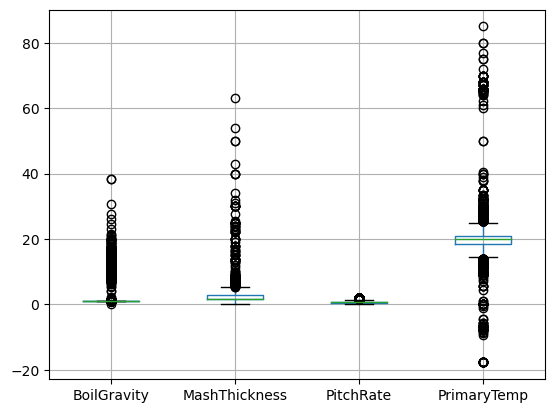

In [24]:
import matplotlib.pyplot as plt
concatenado.boxplot(column= ['BoilGravity', 'MashThickness', 'PitchRate', 'PrimaryTemp'])
plt.show()

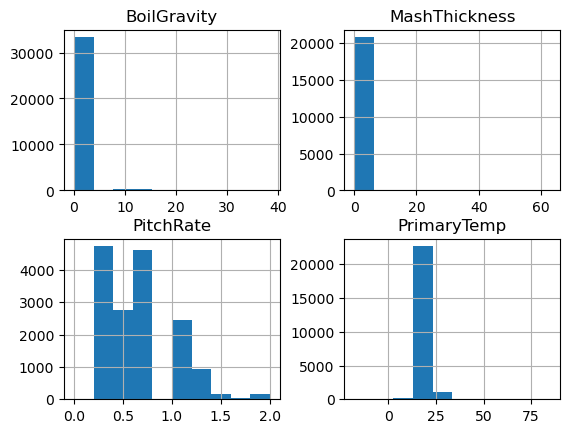

In [25]:
concatenado.hist(column= ['BoilGravity', 'MashThickness', 'PitchRate', 'PrimaryTemp'])
plt.show()

In [26]:
concatenado['PitchRate'].fillna(concatenado['PitchRate'].mean(), inplace=True)
concatenado.fillna(concatenado.median(), inplace=True)

In [27]:
faltantes = concatenado.isnull().sum()
faltantes_percentual = (concatenado.isnull().sum() / len(concatenado['StyleID'])) * 100
print(faltantes_percentual)

StyleID          0.0
Size(L)          0.0
OG               0.0
FG               0.0
ABV              0.0
IBU              0.0
Color            0.0
BoilSize         0.0
BoilTime         0.0
BoilGravity      0.0
Efficiency       0.0
MashThickness    0.0
SugarScale       0.0
PitchRate        0.0
PrimaryTemp      0.0
All Grain        0.0
BIAB             0.0
Partial Mash     0.0
extract          0.0
dtype: float64


In [28]:
#Definindo variáveis preditoras e variável target
y = concatenado['StyleID']
x = concatenado.drop('StyleID', axis=1)

In [29]:
def modeloclassificacao(a,b):
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier #KNN precisa de normalização
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    skfold = StratifiedKFold(n_splits=3)
    x = a
    y = b
    #Normalizando as variáveis preditoras para o KNN:
    normalizador = MinMaxScaler(feature_range = (0, 1))
    x_norm = normalizador.fit_transform(x)
    
    logist = LogisticRegression()
    naive = GaussianNB()
    decision_tree = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    resul_logist = cross_val_score(logist,x,y,cv = skfold)
    resul_naive = cross_val_score(naive,x,y,cv = skfold)
    resul_decision_tree = cross_val_score(decision_tree,x,y,cv = skfold)
    resul_knn = cross_val_score(knn,x_norm,y,cv= skfold)#Recebe a variável normalizada
    dic_classmodels = {'Logistica' :resul_logist.mean(), 'Naive' :resul_naive.mean(), 'Decision Tree' :resul_decision_tree.mean(), 'KNN' :resul_knn.mean()}
    melhor_modelo = max(dic_classmodels, key=dic_classmodels.get)
    print('Reg. Logística:',resul_logist.mean(), '|Naive Bayes:',resul_naive.mean(), '|Decision Tree:',resul_decision_tree.mean(), '|KNN:',resul_knn.mean())
    print('O melhor modelo foi:', melhor_modelo, 'com o valor:', dic_classmodels[melhor_modelo])

In [30]:
modeloclassificacao(x,y)

Reg. Logística: 0.4477755194218609 |Naive Bayes: 0.4171465672990063 |Decision Tree: 0.47021793134598017 |KNN: 0.47628726287262874
O melhor modelo foi: KNN com o valor: 0.47628726287262874


In [31]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

#Normalizando as variáveis preditoras:
normalizador = MinMaxScaler(feature_range = (0 , 1))
X_norm = normalizador.fit_transform(x)

#Definindo os valores que serão testados no KNN:
valores_K = np.array([3,5,7,9])
calculo_distancia = ['minkowski', 'chebyshev']
valores_p = np.array([1,2,3])
valores_grid = {'n_neighbors':valores_K, 'metric':calculo_distancia, 'p':valores_p}

#Criação do modelo:
modelo = KNeighborsClassifier()

#Criando os grids:
gridKNN = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv=3, n_jobs=-1)
gridKNN.fit(X_norm,y)

#Imprimindo os melhores parâmetros:
print("Melhor acurácia: ", gridKNN.best_score_)
print("Melhor K: ", gridKNN.best_estimator_.n_neighbors)
print("Método distância: ", gridKNN.best_estimator_.metric)
print("Melhor valor p: ", gridKNN.best_estimator_.p)

Melhor acurácia:  0.5072549683830171
Melhor K:  9
Método distância:  minkowski
Melhor valor p:  1


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Criação do modelo:
modelo = GradientBoostingClassifier(n_estimators=300)
skfold = StratifiedKFold(n_splits=3)
resultado = cross_val_score(modelo,x,y,cv = skfold, n_jobs=-1)
print(resultado.mean())

0.6091068202348691
